<a id='top_cell'></a>

<h2>WeatherPy Analysis</h2>
<blockquote><p>For this project, I created a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, I utilized a simple Python library called [citipy](https://pypi.python.org/pypi/citipy) and the [OpenWeatherMap API](https://openweathermap.org/api). </p></blockquote>

<strong>Analysis</strong>
<ul>
<li>From the [City Latitude vs. Max Temperature graph](#another_cell), I can see that a lower absolute value of latitudes show higher temperature. This means that areas closer to the equator receive higher temperatures, whereas areas farther away from the equator receive lower temperatures. </li>
<li>From the [Latitude vs. Humidity Plot](#hum_cell), it appears that the average humidity is higher where the latitude is higher (northern hemisphere). However, my data is takien from the middle of March 2018. This may be due to the seasons. A more accurate assessment would have to be taken with historical data from the different times of the year.</li>
<li>From the [Latitude vs Windspeed Plot](#wind_cell), the lower wind speeds appeared closer to the equator (lower absolute values of latitudes). By contrast, higher wind speeds appear farther from the equator.</li>
<li>There aren't any visible patterns in the [Latitude vs Cloudiness plot](#cloud_cell).</li>
</ul>


<p>Additional Resources:</p>
<ul>
<li>[geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm)</li>
<li>[citypy](https://github.com/wingchen/citipy)</li>
</ul>

In [6]:
import requests
from citipy import citipy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
api_address = "http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q="
api_key = '224f7b3f56aba61567ec7c77e410d506'

In [9]:
# Creating coordinate points. A point is referenced by its longitude and latitude values.
#Utilize numpy.random to generate random latitudes and longitudes.
#Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 
#Longitude values are measured relative to the prime meridian. They range from -180° when traveling west to 180° when traveling east.
#Since the size is 2500, 2,500 values will be generated.
#These points will append to the coordinates series/list.
cities = []
coordinates = []

lat = np.random.uniform(low=-90, high=90, size=2500)
lng = np.random.uniform(low=-180, high=180, size=2500)

for x in range(0,len(lat)):
    coordinates.append((lat[x], lng[x]))
    
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# Creating DataFrame
# Find the cities.
cities_df = pd.DataFrame(cities)
cities_df["City Name"] = ""
cities_df["Country Code"] = ""
cities_df.head()

,0,City Name,Country Code
0,<citipy.citipy.City object at 0x0000029B032E84E0>,,
1,<citipy.citipy.City object at 0x0000029B04D676D8>,,
2,<citipy.citipy.City object at 0x0000029B03910748>,,
3,<citipy.citipy.City object at 0x0000029B04A26908>,,
4,<citipy.citipy.City object at 0x0000029B02FDFCF8>,,


In [10]:
print(coordinates[1])
print(cities[1])

(-18.202419988366501, 179.80155485946676)


In [11]:
coordinates_df = pd.DataFrame({"Lat": lat,
                              "Lon": lng})
coordinates_df.head()

,Lat,Lon
0,-52.730814,-112.630807
1,-52.730814,179.801555
2,-52.730814,135.652084
3,-52.730814,-178.948781
4,-52.730814,-74.257536


In [12]:
coord_df = coordinates_df
coord_df.head()

,Lat,Lon
0,-52.730814,-112.630807
1,-52.730814,179.801555
2,-52.730814,135.652084
3,-52.730814,-178.948781
4,-52.730814,-74.257536


In [13]:
# cities = []
# coordinates = []

# lat = np.random.uniform(low=-90, high=90, size=2500)
# lng = np.random.uniform(low=-180, high=180, size=2500)

# for x in range(0,len(lat)):
#     coordinates.append((lat[x], lng[x]))
 
#NEITHER WORK
# for coordinate_pair in coord_df:
#     lat, lng = coordinate_pair
#     cities.append(citipy.nearest_city(lat, lng))
    
# #NEITHER WORK    
# for lat, lng in coord_df.iteritems():
#     cities.append(citipy.nearest_city(lat, lng))
    
#lon
# Creating DataFrame
#coordinates
cities
#cities_df = pd.DataFrame(cities)

 ...]

In [14]:
coord_df['City Name'] = ""
coord_df['Country'] = ""
coord_df['Temperature (F)'] = ""
coord_df['Humidity (%)'] = ""
coord_df['Cloudiness (%)'] = ""
coord_df['Wind Speed (mph)'] = ""

coord_df.head()

,Lat,Lon,City Name,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,-52.730814,-112.630807,,,,,,
1,-52.730814,179.801555,,,,,,
2,-52.730814,135.652084,,,,,,
3,-52.730814,-178.948781,,,,,,
4,-52.730814,-74.257536,,,,,,


In [16]:
#pandas iloc 
for index, row in cities_df.iterrows():
    row["City Name"] = cities_df.iloc[index,0].city_name
    row["Country Code"] = cities_df.iloc[index,0].country_code
    #iloc[index,0]
print(cities_df)
# Drop duplicate cities.
cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
cities_df.reset_index(inplace=True)

# # Delete unnecessary columns
del cities_df[0]
del cities_df['index']

cities_df.head()

                                                      0         City Name  \
0     <citipy.citipy.City object at 0x0000029B032E84E0>      punta arenas   
1     <citipy.citipy.City object at 0x0000029B04D676D8>           isangel   
2     <citipy.citipy.City object at 0x0000029B03910748>              biak   
3     <citipy.citipy.City object at 0x0000029B04A26908>             kapaa   
4     <citipy.citipy.City object at 0x0000029B02FDFCF8>           ushuaia   
5     <citipy.citipy.City object at 0x0000029B02FF64E0>       neulengbach   
6     <citipy.citipy.City object at 0x0000029B0409A8D0>           mataura   
7     <citipy.citipy.City object at 0x0000029B045BF8D0>        chokurdakh   
8     <citipy.citipy.City object at 0x0000029B03018D68>           ngukurr   
9     <citipy.citipy.City object at 0x0000029B0323A080>       clyde river   
10    <citipy.citipy.City object at 0x0000029B04A264E0>              hilo   
11    <citipy.citipy.City object at 0x0000029B030047F0>            albany   

,City Name,Country Code
0,punta arenas,cl
1,isangel,vu
2,biak,id
3,kapaa,us
4,ushuaia,ar


In [17]:
cities_df.head()

,City Name,Country Code
0,punta arenas,cl
1,isangel,vu
2,biak,id
3,kapaa,us
4,ushuaia,ar


In [18]:
# Adding columns for values for cities_df, not coordinates_df. 
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,,,,,,
1,isangel,vu,,,,,,
2,biak,id,,,,,,
3,kapaa,us,,,,,,
4,ushuaia,ar,,,,,,


In [19]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="
query_url = f"{url}appid={api_key}&units={units}"

In [20]:
api_key

'224f7b3f56aba61567ec7c77e410d506'

In [43]:
print("Beginning Data Retrieval")
print("---------------------------------")

for index, row in cities_df.iterrows():
    #for index, row in cities_df.iterrows():
#for row in cities_df:
#.items
    #to test print row and two of the series from that row:
    print(index, row, row['City Name'], row['Country Code']) 
    print("Processing Record " + str(index) + "of Set 1 | " + str(row['City Name']))
     #url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], row['Country Code'], api_key)
#     params = {
#         "key": api_key
#     }
    url = "http://api.openweathermap.org/data/2.5/weather?appid=%s&q=%s&units=imperial" % (api_key, row['City Name'])
    print(url)
    weather_data = requests.get(url)
    #.json() above
    print(weather_data.url)
    weather_data = weather_data.json()
    #Append
    
    try:
    #Append the data with exception handling in case data doesn't exist for a city. 
#         cities_df.loc[index, 'Latitude'] = weather_data['coord']['lat']
#         cities_df.loc[index,'Longitude'] = weather_data['coord']['lon']
#         cities_df.loc[index,'Temperature (F)'] = weather_data['main']['temp']
#         cities_df.loc[index,'Humidity (%)'] = weather_data['main']['humidity']
#         cities_df.loc[index,'Cloudiness (%)'] = weather_data['clouds']['all']
#         cities_df.loc[index,'Wind Speed (mph)'] = weather_data['wind']['speed']
        
        lati = weather_data['coord']['lat']
        long = weather_data['coord']['lon']
        temper = weather_data['main']['temp']
        humi = weather_data['main']['humidity']
        cloud = weather_data['clouds']['all']
        wind = weather_data['wind']['speed']
        
        cities_df.set_value(index, "Latitude", lati)
        cities_df.set_value(index, "Longitude", long)
        cities_df.set_value(index, "Temperature (F)", temper)
        cities_df.set_value(index, "Humidity (%)", humi)
        cities_df.set_value(index, "Cloudiness (%)", cloud)
        cities_df.set_value(index, "Wind Speed (mph)", wind)
        
#Temperature (F)	Humidity (%)	Cloudiness (%)	Wind Speed (mph)
#         row['Longitude'] = weather_data['coord']['lon']
#         row['Temperature (F)'] = weather_data['main']['temp']
#         row['Humidity (%)'] = weather_data['main']['humidity']
#         row['Cloudiness (%)'] = weather_data['clouds']['all']
#         row['Wind Speed (mph)'] = weather_data['wind']['speed']
    
    except:
        print("Error")
        continue
    
    
    #use exception handling in case the city doesn't match
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
0 City Name           punta arenas
Country Code                  cl
Latitude                  -53.16
Longitude                 -70.91
Temperature (F)             46.4
Humidity (%)                 100
Cloudiness (%)                75
Wind Speed (mph)            26.4
Name: 0, dtype: object punta arenas cl
Processing Record 0of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=punta arenas&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=punta%20arenas&units=imperial
1 City Name           isangel
Country Code             vu
Latitude             -19.55
Longitude            169.27
Temperature (F)       80.36
Humidity (%)            100
Cloudiness (%)           68
Wind Speed (mph)      10.18
Name: 1, dtype: object isangel vu
Processing Record 1of Set 1 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=margate&units=imperial
19 City Name           atuona
Country Code            pf
Latitude              -9.8
Longitude          -139.03
Temperature (F)      82.34
Humidity (%)            98
Cloudiness (%)          56
Wind Speed (mph)     19.24
Name: 19, dtype: object atuona pf
Processing Record 19of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=atuona&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=atuona&units=imperial
20 City Name           fort smith
Country Code                us
Latitude                 35.39
Longitude               -94.42
Temperature (F)           66.2
Humidity (%)                45
Cloudiness (%)              40
Wind Speed (mph)          8.05
Name: 20, dtype: object fort smith us
Processing Record 20of Set 1 | fort smith
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=jamestown&units=imperial
38 City Name           bonthe
Country Code            sl
Latitude              7.53
Longitude            -12.5
Temperature (F)      80.36
Humidity (%)            82
Cloudiness (%)          48
Wind Speed (mph)      5.14
Name: 38, dtype: object bonthe sl
Processing Record 38of Set 1 | bonthe
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bonthe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bonthe&units=imperial
39 City Name             bud
Country Code           no
Latitude            62.91
Longitude            6.91
Temperature (F)     36.21
Humidity (%)           80
Cloudiness (%)         75
Wind Speed (mph)    27.51
Name: 39, dtype: object bud no
Processing Record 39of Set 1 | bud
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bud&units=i

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=puerto%20ayora&units=imperial
55 City Name           guerrero negro
Country Code                    mx
Latitude                     27.97
Longitude                  -114.04
Temperature (F)              68.84
Humidity (%)                    46
Cloudiness (%)                  24
Wind Speed (mph)             11.74
Name: 55, dtype: object guerrero negro mx
Processing Record 55of Set 1 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=guerrero negro&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=guerrero%20negro&units=imperial
56 City Name           hualmay
Country Code             pe
Latitude              -11.1
Longitude            -77.61
Temperature (F)       76.04
Humidity (%)             64
Cloudiness (%)            0
Wind Speed (mph)       4.14
Name: 56, dtype: object hualmay pe
Processing 

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pasighat&units=imperial
75 City Name           putina
Country Code            pe
Latitude            -14.91
Longitude           -69.87
Temperature (F)         59
Humidity (%)            58
Cloudiness (%)          40
Wind Speed (mph)     12.75
Name: 75, dtype: object putina pe
Processing Record 75of Set 1 | putina
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=putina&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=putina&units=imperial
76 City Name           barrow
Country Code            us
Latitude            -38.31
Longitude           -60.23
Temperature (F)      56.96
Humidity (%)           100
Cloudiness (%)          92
Wind Speed (mph)     16.11
Name: 76, dtype: object barrow us
Processing Record 76of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kubrat&units=imperial
93 City Name           amahai
Country Code            id
Latitude             -3.31
Longitude              129
Temperature (F)       80.9
Humidity (%)           100
Cloudiness (%)          36
Wind Speed (mph)      4.36
Name: 93, dtype: object amahai id
Processing Record 93of Set 1 | amahai
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=amahai&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=amahai&units=imperial
94 City Name           saint-philippe
Country Code                    re
Latitude                     45.36
Longitude                   -73.48
Temperature (F)              18.93
Humidity (%)                    29
Cloudiness (%)                   1
Wind Speed (mph)               4.7
Name: 94, dtype: object saint-philippe re
Processing Record 94of Set 1 | saint-philippe
http://a

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=carnarvon&units=imperial
111 City Name           dzhebariki-khaya
Country Code                      ru
Latitude                       62.22
Longitude                      135.8
Temperature (F)               -19.55
Humidity (%)                      56
Cloudiness (%)                    56
Wind Speed (mph)                2.68
Name: 111, dtype: object dzhebariki-khaya ru
Processing Record 111of Set 1 | dzhebariki-khaya
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=dzhebariki-khaya&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=dzhebariki-khaya&units=imperial
112 City Name           tasiilaq
Country Code              gl
Latitude               65.61
Longitude             -37.64
Temperature (F)         33.8
Humidity (%)              80
Cloudiness (%)            92
Wind Speed (mph)        26.4
Name: 112, dtype:

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ribeira%20grande&units=imperial
126 City Name           leningradskiy
Country Code                   ru
Latitude                    69.38
Longitude                  178.42
Temperature (F)              -7.4
Humidity (%)                   93
Cloudiness (%)                 68
Wind Speed (mph)             4.59
Name: 126, dtype: object leningradskiy ru
Processing Record 126of Set 1 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=leningradskiy&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=leningradskiy&units=imperial
127 City Name           okhtyrka
Country Code              ua
Latitude               50.31
Longitude              34.89
Temperature (F)         10.7
Humidity (%)              79
Cloudiness (%)            88
Wind Speed (mph)       14.43
Name: 127, dtype: object okhtyrka ua
Processin

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=san%20carlos%20de%20bariloche&units=imperial
141 City Name           aktau
Country Code           kz
Latitude            43.65
Longitude           51.16
Temperature (F)      46.4
Humidity (%)          100
Cloudiness (%)         90
Wind Speed (mph)    13.42
Name: 141, dtype: object aktau kz
Processing Record 141of Set 1 | aktau
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=aktau&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=aktau&units=imperial
142 City Name           port shepstone
Country Code                    za
Latitude                    -30.74
Longitude                    30.45
Temperature (F)              73.07
Humidity (%)                    92
Cloudiness (%)                  36
Wind Speed (mph)             17.67
Name: 142, dtype: object port shepstone za
Processing Record 142of Set 1 | port s

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=champasak&units=imperial
158 City Name           grand river south east
Country Code                            mu
Latitude                                  
Longitude                                 
Temperature (F)                           
Humidity (%)                              
Cloudiness (%)                            
Wind Speed (mph)                          
Name: 158, dtype: object grand river south east mu
Processing Record 158of Set 1 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=grand river south east&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=grand%20river%20south%20east&units=imperial
Error
159 City Name           longfeng
Country Code              cn
Latitude               31.05
Longitude             103.87
Temperature (F)         57.2
Humidity (%)        

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pangnirtung&units=imperial
175 City Name           fort saint john
Country Code                     ca
Latitude                           
Longitude                          
Temperature (F)                    
Humidity (%)                       
Cloudiness (%)                     
Wind Speed (mph)                   
Name: 175, dtype: object fort saint john ca
Processing Record 175of Set 1 | fort saint john
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=fort saint john&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=fort%20saint%20john&units=imperial
Error
176 City Name           muros
Country Code           es
Latitude            42.77
Longitude           -9.06
Temperature (F)      44.6
Humidity (%)           81
Cloudiness (%)         40
Wind Speed (mph)     5.82
Name: 176, dtype: object muros es
Process

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=talavera&units=imperial
195 City Name           bengkulu
Country Code              id
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 195, dtype: object bengkulu id
Processing Record 195of Set 1 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bengkulu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bengkulu&units=imperial
Error
196 City Name            inzai
Country Code            jp
Latitude              35.8
Longitude           140.18
Temperature (F)       47.5
Humidity (%)            87
Cloudiness (%)          75
Wind Speed (mph)      2.24
Name: 196, dtype: object inzai jp
Processing Record 196of Set 1 | inzai
http://api.openweathermap.org/data/2.5/weather?appid

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=san%20rafael&units=imperial
213 City Name           umzimvubu
Country Code               za
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 213, dtype: object umzimvubu za
Processing Record 213of Set 1 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=umzimvubu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=umzimvubu&units=imperial
Error
214 City Name           grand gaube
Country Code                 mu
Latitude                 -20.01
Longitude                 57.66
Temperature (F)            80.6
Humidity (%)                 88
Cloudiness (%)               40
Wind Speed (mph)          13.87
Name: 214, dtype: object grand gaube mu
Processing Record 214of Set 

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lagoa&units=imperial
228 City Name           cidreira
Country Code              br
Latitude              -30.17
Longitude             -50.22
Temperature (F)        83.24
Humidity (%)              75
Cloudiness (%)            12
Wind Speed (mph)        8.39
Name: 228, dtype: object cidreira br
Processing Record 228of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=cidreira&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=cidreira&units=imperial
229 City Name           vaitupu
Country Code             wf
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 229, dtype: object vaitupu wf
Processing Record 229of Set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=north%20bend&units=imperial
244 City Name            tura
Country Code           ru
Latitude            25.52
Longitude           90.21
Temperature (F)     57.41
Humidity (%)           67
Cloudiness (%)          0
Wind Speed (mph)     3.47
Name: 244, dtype: object tura ru
Processing Record 244of Set 1 | tura
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tura&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tura&units=imperial
245 City Name            lata
Country Code           sb
Latitude            30.78
Longitude           78.62
Temperature (F)     43.19
Humidity (%)           56
Cloudiness (%)          8
Wind Speed (mph)     3.02
Name: 245, dtype: object lata sb
Processing Record 245of Set 1 | lata
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lata&units=imper

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ponta%20delgada&units=imperial
264 City Name           te anau
Country Code             nz
Latitude             -45.41
Longitude            167.72
Temperature (F)       61.91
Humidity (%)             70
Cloudiness (%)           56
Wind Speed (mph)      17.78
Name: 264, dtype: object te anau nz
Processing Record 264of Set 1 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=te anau&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=te%20anau&units=imperial
265 City Name           felipe carrillo puerto
Country Code                            mx
Latitude                             19.58
Longitude                           -88.05
Temperature (F)                      92.87
Humidity (%)                            40
Cloudiness (%)                           0
Wind Speed (mph)                      8.72
Name:

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=victoria&units=imperial
282 City Name           umea
Country Code          se
Latitude                
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (mph)        
Name: 282, dtype: object umea se
Processing Record 282of Set 1 | umea
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=umea&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=umea&units=imperial
283 City Name           san cristobal
Country Code                   ec
Latitude                         
Longitude                        
Temperature (F)                  
Humidity (%)                     
Cloudiness (%)                   
Wind Speed (mph)                 
Name: 283, dtype: object san cristobal ec
Processing Record 283of Set 1 | san cristobal
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kloulklubed&units=imperial
298 City Name           deming
Country Code            us
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 298, dtype: object deming us
Processing Record 298of Set 1 | deming
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=deming&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=deming&units=imperial
299 City Name           eenhana
Country Code             na
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 299, dtype: object eenhana na
Processing Record 299of Set 1 | eenhana
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba6

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tarakan&units=imperial
313 City Name           prince rupert
Country Code                   ca
Latitude                         
Longitude                        
Temperature (F)                  
Humidity (%)                     
Cloudiness (%)                   
Wind Speed (mph)                 
Name: 313, dtype: object prince rupert ca
Processing Record 313of Set 1 | prince rupert
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=prince rupert&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=prince%20rupert&units=imperial
314 City Name           fortuna
Country Code             us
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 314, dtype: object fortuna us
Processing Record 314of S

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=faya&units=imperial
328 City Name           asfi
Country Code          ma
Latitude                
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (mph)        
Name: 328, dtype: object asfi ma
Processing Record 328of Set 1 | asfi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=asfi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=asfi&units=imperial
Error
329 City Name           pangody
Country Code             ru
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 329, dtype: object pangody ru
Processing Record 329of Set 1 | pangody
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pang

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kirakira&units=imperial
344 City Name           guilin
Country Code            cn
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 344, dtype: object guilin cn
Processing Record 344of Set 1 | guilin
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=guilin&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=guilin&units=imperial
345 City Name           port lincoln
Country Code                  au
Latitude                        
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (mph)                
Name: 345, dtype: object port lincoln au
Processing Record 345of Set 1 | port lincoln
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=qorveh&units=imperial
360 City Name           carmen
Country Code            mx
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 360, dtype: object carmen mx
Processing Record 360of Set 1 | carmen
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=carmen&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=carmen&units=imperial
361 City Name           ponta do sol
Country Code                  pt
Latitude                        
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (mph)                
Name: 361, dtype: object ponta do sol pt
Processing Record 361of Set 1 | ponta do sol
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=porto%20novo&units=imperial
375 City Name           rawannawi
Country Code               ki
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 375, dtype: object rawannawi ki
Processing Record 375of Set 1 | rawannawi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=rawannawi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=rawannawi&units=imperial
Error
376 City Name           pontes e lacerda
Country Code                      br
Latitude                            
Longitude                           
Temperature (F)                     
Humidity (%)                        
Cloudiness (%)                      
Wind Speed (mph)                    
Name: 376, dtype: object pon

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=vievis&units=imperial
391 City Name           amderma
Country Code             ru
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 391, dtype: object amderma ru
Processing Record 391of Set 1 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=amderma&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=amderma&units=imperial
Error
392 City Name           hanyang
Country Code             cn
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 392, dtype: object hanyang cn
Processing Record 392of Set 1 | hanyang
http://api.openweathermap.org/data/2.5/weather?appid=2

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=nantucket&units=imperial
407 City Name           bosaso
Country Code            so
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 407, dtype: object bosaso so
Processing Record 407of Set 1 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bosaso&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bosaso&units=imperial
408 City Name           ust-kuyga
Country Code               ru
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 408, dtype: object ust-kuyga ru
Processing Record 408of Set 1 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pontianak&units=imperial
422 City Name           xining
Country Code            cn
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 422, dtype: object xining cn
Processing Record 422of Set 1 | xining
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=xining&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=xining&units=imperial
423 City Name           saint-georges
Country Code                   gf
Latitude                         
Longitude                        
Temperature (F)                  
Humidity (%)                     
Cloudiness (%)                   
Wind Speed (mph)                 
Name: 423, dtype: object saint-georges gf
Processing Record 423of Set 1 | saint-georges
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sakakah&units=imperial
Error
438 City Name           batticaloa
Country Code                lk
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 438, dtype: object batticaloa lk
Processing Record 438of Set 1 | batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=batticaloa&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=batticaloa&units=imperial
439 City Name           at-bashi
Country Code              kg
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 439, dtype: object at-bashi kg
Processing Record 439of Set 1 | at-bashi
http://

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=yeppoon&units=imperial
453 City Name           shenjiamen
Country Code                cn
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 453, dtype: object shenjiamen cn
Processing Record 453of Set 1 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=shenjiamen&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=shenjiamen&units=imperial
454 City Name           bucksport
Country Code               us
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 454, dtype: object bucksport us
Processing Record 454of Set 1 | bucksport
htt

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=najran&units=imperial
468 City Name           monticello
Country Code                us
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 468, dtype: object monticello us
Processing Record 468of Set 1 | monticello
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=monticello&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=monticello&units=imperial
469 City Name           fillmore
Country Code              us
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 469, dtype: object fillmore us
Processing Record 469of Set 1 | fillmore
http://api.ope

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=goderich&units=imperial
483 City Name           kismayo
Country Code             so
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 483, dtype: object kismayo so
Processing Record 483of Set 1 | kismayo
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kismayo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kismayo&units=imperial
Error
484 City Name           tongsa
Country Code            bt
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 484, dtype: object tongsa bt
Processing Record 484of Set 1 | tongsa
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f5

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=brokopondo&units=imperial
498 City Name           karaul
Country Code            ru
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 498, dtype: object karaul ru
Processing Record 498of Set 1 | karaul
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=karaul&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=karaul&units=imperial
Error
499 City Name           jarjis
Country Code            tn
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 499, dtype: object jarjis tn
Processing Record 499of Set 1 | jarjis
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567e

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=deputatskiy&units=imperial
514 City Name           nivala
Country Code            fi
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 514, dtype: object nivala fi
Processing Record 514of Set 1 | nivala
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=nivala&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=nivala&units=imperial
515 City Name           ovalle
Country Code            cl
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 515, dtype: object ovalle cl
Processing Record 515of Set 1 | ovalle
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=polunochnoye&units=imperial
530 City Name           ambanja
Country Code             mg
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 530, dtype: object ambanja mg
Processing Record 530of Set 1 | ambanja
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ambanja&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ambanja&units=imperial
531 City Name           gazojak
Country Code             tm
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 531, dtype: object gazojak tm
Processing Record 531of Set 1 | gazojak
http://api.openweathermap.org/data/2.5/weather?appid=2

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=cangzhou&units=imperial
546 City Name           dryden
Country Code            ca
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 546, dtype: object dryden ca
Processing Record 546of Set 1 | dryden
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=dryden&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=dryden&units=imperial
547 City Name           manta
Country Code           ec
Latitude                 
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (mph)         
Name: 547, dtype: object manta ec
Processing Record 547of Set 1 | manta
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ma

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pangkalanbuun&units=imperial
562 City Name           eyl
Country Code         so
Latitude               
Longitude              
Temperature (F)        
Humidity (%)           
Cloudiness (%)         
Wind Speed (mph)       
Name: 562, dtype: object eyl so
Processing Record 562of Set 1 | eyl
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=eyl&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=eyl&units=imperial
563 City Name           sisimiut
Country Code              gl
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 563, dtype: object sisimiut gl
Processing Record 563of Set 1 | sisimiut
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sis

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=morozovsk&units=imperial
579 City Name           baherden
Country Code              tm
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 579, dtype: object baherden tm
Processing Record 579of Set 1 | baherden
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=baherden&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=baherden&units=imperial
580 City Name           jaisalmer
Country Code               in
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 580, dtype: object jaisalmer in
Processing Record 580of Set 1 | jaisalmer
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=salinas&units=imperial
595 City Name           bryan
Country Code           us
Latitude                 
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (mph)         
Name: 595, dtype: object bryan us
Processing Record 595of Set 1 | bryan
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bryan&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bryan&units=imperial
596 City Name           kamaishi
Country Code              jp
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 596, dtype: object kamaishi jp
Processing Record 596of Set 1 | kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=santa%20isabel%20do%20rio%20negro&units=imperial
611 City Name           neryungri
Country Code               ru
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 611, dtype: object neryungri ru
Processing Record 611of Set 1 | neryungri
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=neryungri&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=neryungri&units=imperial
612 City Name           morris
Country Code            ca
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 612, dtype: object morris ca
Processing Record 612of Set 1 | morris
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pacifica&units=imperial
627 City Name           reshetnikovo
Country Code                  ru
Latitude                        
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (mph)                
Name: 627, dtype: object reshetnikovo ru
Processing Record 627of Set 1 | reshetnikovo
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=reshetnikovo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=reshetnikovo&units=imperial
628 City Name           huainan
Country Code             cn
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 628, dtype: object huainan cn
Processing Record 628of Set 1 | huaina

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ossora&units=imperial
644 City Name           magdagachi
Country Code                ru
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 644, dtype: object magdagachi ru
Processing Record 644of Set 1 | magdagachi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=magdagachi&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=magdagachi&units=imperial
645 City Name           labuhan
Country Code             id
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 645, dtype: object labuhan id
Processing Record 645of Set 1 | labuhan
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=muroto&units=imperial
660 City Name           cacoal
Country Code            br
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 660, dtype: object cacoal br
Processing Record 660of Set 1 | cacoal
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=cacoal&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=cacoal&units=imperial
661 City Name           paramirim
Country Code               br
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 661, dtype: object paramirim br
Processing Record 661of Set 1 | paramirim
http://api.openweathermap.org/data/2.5/weather?appid

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=adre&units=imperial
676 City Name           taltal
Country Code            cl
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 676, dtype: object taltal cl
Processing Record 676of Set 1 | taltal
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=taltal&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=taltal&units=imperial
677 City Name           oranjestad
Country Code                aw
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 677, dtype: object oranjestad aw
Processing Record 677of Set 1 | oranjestad
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=gamba&units=imperial
692 City Name           bondo
Country Code           cd
Latitude                 
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (mph)         
Name: 692, dtype: object bondo cd
Processing Record 692of Set 1 | bondo
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bondo&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bondo&units=imperial
693 City Name           jasper
Country Code            ca
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 693, dtype: object jasper ca
Processing Record 693of Set 1 | jasper
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=jasper&

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sao%20joao%20da%20barra&units=imperial
708 City Name           khonuu
Country Code            ru
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 708, dtype: object khonuu ru
Processing Record 708of Set 1 | khonuu
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=khonuu&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=khonuu&units=imperial
Error
709 City Name           lukuledi
Country Code              tz
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 709, dtype: object lukuledi tz
Processing Record 709of Set 1 | lukuledi
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ayan&units=imperial
724 City Name           alamor
Country Code            ec
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 724, dtype: object alamor ec
Processing Record 724of Set 1 | alamor
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=alamor&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=alamor&units=imperial
725 City Name           lauria
Country Code            it
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 725, dtype: object lauria it
Processing Record 725of Set 1 | lauria
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d50

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=san%20andres&units=imperial
740 City Name           praia
Country Code           cv
Latitude                 
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (mph)         
Name: 740, dtype: object praia cv
Processing Record 740of Set 1 | praia
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=praia&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=praia&units=imperial
741 City Name           orastioara de sus
Country Code                       ro
Latitude                             
Longitude                            
Temperature (F)                      
Humidity (%)                         
Cloudiness (%)                       
Wind Speed (mph)                     
Name: 741, dtype: object orastioara de sus ro
Processing Record 741of Set 

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=svobodnyy&units=imperial
756 City Name           krasnoselkup
Country Code                  ru
Latitude                        
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (mph)                
Name: 756, dtype: object krasnoselkup ru
Processing Record 756of Set 1 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=krasnoselkup&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=krasnoselkup&units=imperial
Error
757 City Name           reitz
Country Code           za
Latitude                 
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (mph)         
Name: 757, dtype: object reitz za
Processing Record 757of Set 1 | reitz
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=adrar&units=imperial
772 City Name           puerto escondido
Country Code                      mx
Latitude                            
Longitude                           
Temperature (F)                     
Humidity (%)                        
Cloudiness (%)                      
Wind Speed (mph)                    
Name: 772, dtype: object puerto escondido mx
Processing Record 772of Set 1 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=puerto escondido&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=puerto%20escondido&units=imperial
773 City Name           kanigoro
Country Code              id
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 773, dtype: o

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ukiah&units=imperial
788 City Name           canala
Country Code            nc
Latitude                  
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (mph)          
Name: 788, dtype: object canala nc
Processing Record 788of Set 1 | canala
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=canala&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=canala&units=imperial
789 City Name           inhambane
Country Code               mz
Latitude                     
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (mph)             
Name: 789, dtype: object inhambane mz
Processing Record 789of Set 1 | inhambane
http://api.openweathermap.org/data/2.5/weather?appid=

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=leshukonskoye&units=imperial
804 City Name           fare
Country Code          pf
Latitude                
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (mph)        
Name: 804, dtype: object fare pf
Processing Record 804of Set 1 | fare
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=fare&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=fare&units=imperial
805 City Name           sao gabriel
Country Code                 br
Latitude                       
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (mph)               
Name: 805, dtype: object sao gabriel br
Processing Record 805of Set 1 | sao gabriel
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sao%20jose%20da%20coroa%20grande&units=imperial
820 City Name           channel-port aux basques
Country Code                              ca
Latitude                                    
Longitude                                   
Temperature (F)                             
Humidity (%)                                
Cloudiness (%)                              
Wind Speed (mph)                            
Name: 820, dtype: object channel-port aux basques ca
Processing Record 820of Set 1 | channel-port aux basques
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=channel-port aux basques&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=channel-port%20aux%20basques&units=imperial
821 City Name           diffa
Country Code           ne
Latitude                 
Longitude                
Temperature (F)       

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=shache&units=imperial
836 City Name           kargasok
Country Code              ru
Latitude                    
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (mph)            
Name: 836, dtype: object kargasok ru
Processing Record 836of Set 1 | kargasok
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kargasok&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kargasok&units=imperial
837 City Name           banda aceh
Country Code                id
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 837, dtype: object banda aceh id
Processing Record 837of Set 1 | banda aceh
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sangar&units=imperial
852 City Name           mocambique
Country Code                mz
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 852, dtype: object mocambique mz
Processing Record 852of Set 1 | mocambique
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mocambique&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mocambique&units=imperial
Error
853 City Name           gusau
Country Code           ng
Latitude                 
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (mph)         
Name: 853, dtype: object gusau ng
Processing Record 853of Set 1 | gusau
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=villa%20san%20giovanni&units=imperial
868 City Name           buenos aires
Country Code                  cr
Latitude                        
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (mph)                
Name: 868, dtype: object buenos aires cr
Processing Record 868of Set 1 | buenos aires
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=buenos aires&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=buenos%20aires&units=imperial
869 City Name           ures
Country Code          mx
Latitude                
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (mph)        
Name: 869, dtype: object ures mx
Processing Record 869of Set 1 | ures
http://api.o

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pervomayskoye&units=imperial
883 City Name           waynesboro
Country Code                us
Latitude                      
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (mph)              
Name: 883, dtype: object waynesboro us
Processing Record 883of Set 1 | waynesboro
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=waynesboro&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=waynesboro&units=imperial
884 City Name           iquitos
Country Code             pe
Latitude                   
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (mph)           
Name: 884, dtype: object iquitos pe
Processing Record 884of Set 1 | iquitos
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=port-de-paix&units=imperial
Error
---------------------------------
Data Retrieval Complete
---------------------------------


In [22]:
cities_df.head()
#pandas iloc 
# for index, row in cities_df.iterrows():
#     row["City Name"] = cities_df.iloc[index,0].city_name
#     row["Country Code"] = cities_df.iloc[index,0].country_code
#     #iloc[index,0]
# print(cities_df)
# Drop duplicate cities.
# cities_df.drop_duplicates(['City Name', 'Country Code'], inplace=True)
# cities_df.reset_index(inplace=True)

# # # Delete unnecessary columns
# del cities_df[0]
# del cities_df['index']

# cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,-53.16,-70.91,48.2,,75,29.97
1,isangel,vu,-19.55,169.27,80.36,,68,10.18
2,biak,id,-0.91,122.88,74.78,,80,2.57
3,kapaa,us,22.08,-159.32,71.6,,90,11.41
4,ushuaia,ar,-54.81,-68.31,39.2,,75,19.46


In [23]:
pwd

'C:\\Users\\nisha\\Desktop\\Week7'

In [46]:
#Confirm that cities_df has at least 500 unique values by exporting it to Excel.
path_d = 'C:\\Users\\nisha\\Desktop\\test'
cities_df.to_csv(os.path.join(path_d, 'weatherpy.csv'))
#df.to_dense().to_csv("submission.csv", index = False, sep=',', encoding='utf-8')

In [40]:
#Delete blank values from dataframe. Use dropna.
#cities_df.dropna(inplace=True)
#subset=['Latitude'],
cities_df

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,-53.16,-70.91,48.2,,75,29.97
1,isangel,vu,-19.55,169.27,80.36,,68,10.18
2,biak,id,-0.91,122.88,74.78,,80,2.57
3,kapaa,us,22.08,-159.32,71.6,,90,11.41
4,ushuaia,ar,-54.81,-68.31,39.2,,75,19.46
5,neulengbach,at,48.2,15.91,27.55,,90,10.29
6,mataura,pf,-46.19,168.86,66.05,,100,17
7,chokurdakh,ru,70.62,147.9,-36.29,,8,3.13
8,ngukurr,au,,,,,,
9,clyde river,ca,70.47,-68.59,-13.01,,40,16.11


In [ ]:
# Your objective is to build a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

<strong>Latitude versus Temperature Plot</strong>

In [24]:
cities_df = cities_df[pd.notnull(cities_df['Latitude'])]
cities_df

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,-53.16,-70.91,48.2,,75,29.97
1,isangel,vu,-19.55,169.27,80.36,,68,10.18
2,biak,id,-0.91,122.88,74.78,,80,2.57
3,kapaa,us,22.08,-159.32,71.6,,90,11.41
4,ushuaia,ar,-54.81,-68.31,39.2,,75,19.46
5,neulengbach,at,48.2,15.91,27.55,,90,10.29
6,mataura,pf,-46.19,168.86,66.05,,100,17
7,chokurdakh,ru,70.62,147.9,-36.29,,8,3.13
8,ngukurr,au,,,,,,
9,clyde river,ca,70.47,-68.59,-13.01,,40,16.11


In [58]:
# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,punta arenas,cl,-53.16,-70.91,46.40,100.0,75.0,26.40
1,isangel,vu,-19.55,169.27,80.36,100.0,68.0,10.18
2,biak,id,-0.91,122.88,74.78,100.0,80.0,2.57
3,kapaa,us,22.08,-159.32,71.60,94.0,90.0,11.41
4,ushuaia,ar,-54.81,-68.31,41.00,80.0,75.0,20.80


In [59]:
#Confirm that cities_df has at least 500 unique values by exporting it to Excel.
path_d = 'C:\\Users\\nisha\\Desktop\\test'
cities_df.to_csv(os.path.join(path_d, 'weatherpy2.csv'))

In [81]:
# lslat = cities_df["Latitude"].tolist()
# lslat

In [80]:
# lstemp = cities_df["Temperature (F)"].tolist()
# lstemp

In [38]:
# type(lstemp[0]) # prints <type 'str'>
# lstemp = [float(i) for i in lstemp]

# print type(cities_df[0]) 
# [float(i) for i in lstemp]

<a id='another_cell'></a>

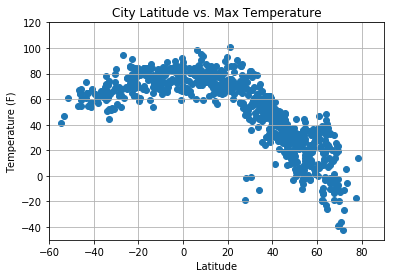

In [98]:
# plt.scatter(cities_df["Latitude"],
#            cities_df["Temperature (F)"],
#            edgecolor = "black", c= 'navy', linewidths = 1, marker = "o",
#            alpha = 0.8)
plt.scatter(cities_df["Latitude"],
            cities_df["Temperature (F)"])
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsTemperature.png")
plt.show()

<a id='hum_cell'></a>

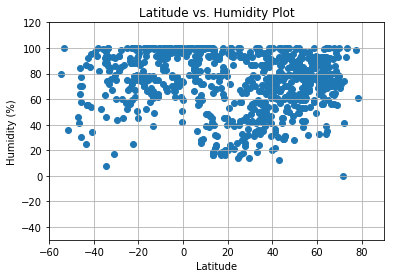

In [93]:
# Humidity (%) vs. Latitude
# lshum = cities_df["Humidity (%)"].tolist()
# plt.scatter(cities_df["Latitude"],
#            cities_df["Humidity (%)"],
#            edgecolor = "black", c= 'navy', linewidths = 1, marker = "o",
#            alpha = 0.8)
plt.scatter(cities_df["Latitude"],
            cities_df["Humidity (%)"])
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity (%)")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsHumidity.png")
plt.show()

<a id='cloud_cell'></a>

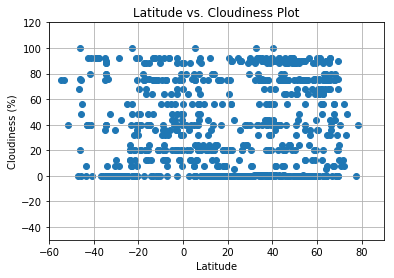

In [94]:
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude
# plt.scatter(cities_df["Latitude"],
#            cities_df["Cloudiness (%)"],
#            edgecolor = "black", c= 'navy', linewidths = 1, marker = "o",
#            alpha = 0.8)
plt.scatter(cities_df["Latitude"],
            cities_df["Cloudiness (%)"])
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness (%)")
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsCloudiness.png")
plt.show()

<a id='wind_cell'></a>

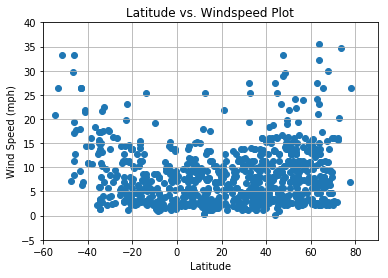

In [95]:
#Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"],
            cities_df["Wind Speed (mph)"])
plt.title("Latitude vs. Windspeed Plot")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.grid(True)
plt.savefig("WeatherPyGraphs/LatitudeVsWindSpeed.png")
plt.show()

[Return to Top](#top_cell)